In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

In [4]:
WINDOW_SIZE = 32

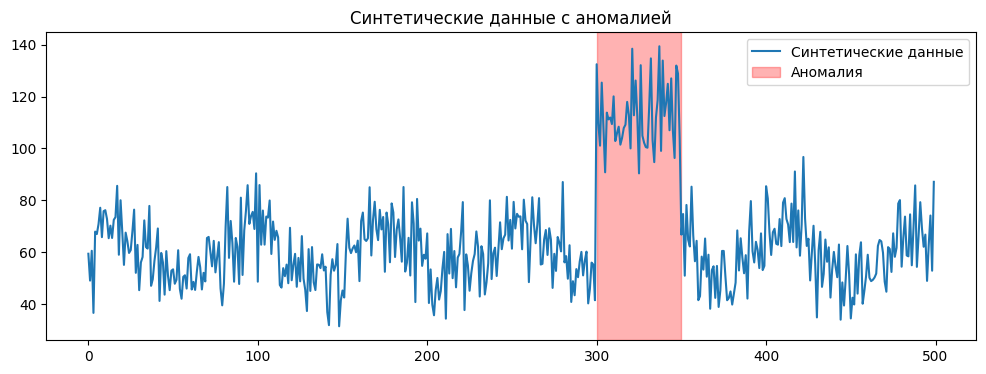

In [5]:
n_points = 500
anomaly_start = 300
anomaly_duration = 50

normal_data = np.sin(np.linspace(0, 40, n_points)) * 10 + 50

anomaly = np.random.normal(100, 10, anomaly_duration)
synthetic = normal_data.copy()
synthetic[anomaly_start:anomaly_start + anomaly_duration] = anomaly
synthetic += np.random.normal(10, 10, len(synthetic))

plt.figure(figsize=(12, 4))
plt.plot(synthetic, label='Синтетические данные')
plt.axvspan(anomaly_start, anomaly_start+anomaly_duration, color='red', alpha=0.3, label='Аномалия')
plt.legend()
plt.title("Синтетические данные с аномалией")
plt.show()

In [6]:
scaler = StandardScaler()
synthetic = synthetic.reshape(-1, 1)
synthetic = scaler.fit_transform(synthetic)

X_test = []

for i in range(len(synthetic) - WINDOW_SIZE + 1):
    X_test.append(synthetic[i:i+WINDOW_SIZE])

X_test = np.array(X_test)

In [17]:
# инференс
model = load_model('lstm-ae-32-model-bs256.h5')
preds = model.predict(X_test)
mse = np.mean(np.square(X_test - preds), axis=(1, 2))

15/15 [==============================] - 2s 18ms/step


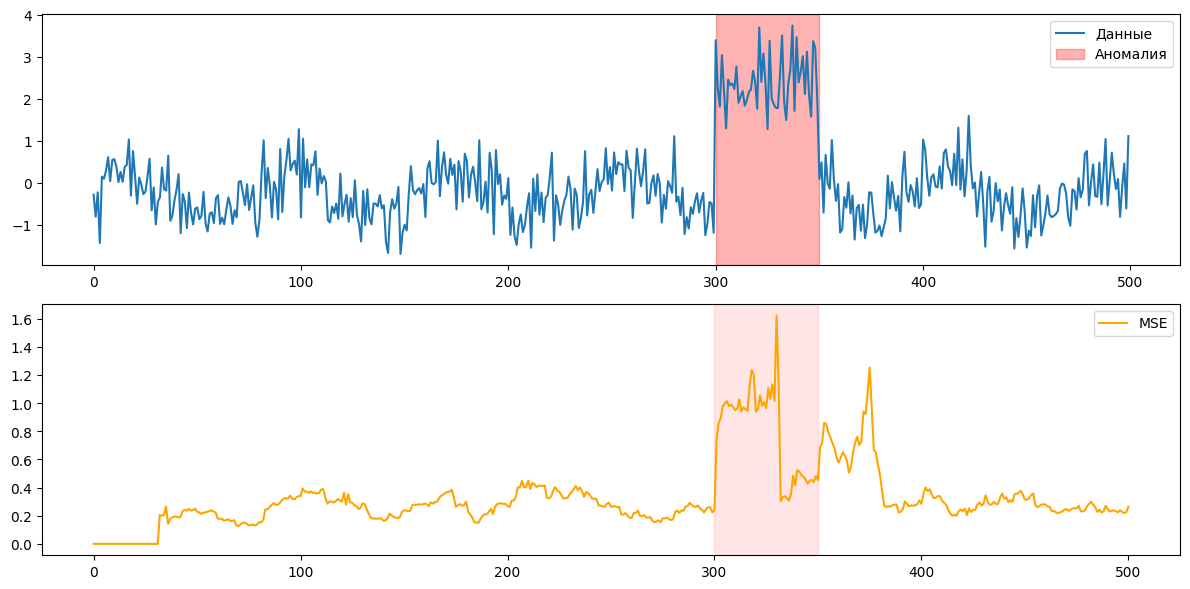

In [18]:
plt.figure(figsize=(12, 6))

# график данных
plt.subplot(2, 1, 1)
plt.plot(synthetic, label='Данные')
plt.axvspan(anomaly_start, anomaly_start+anomaly_duration, color='red', alpha=0.3, label='Аномалия')
plt.legend()

# график ошибок
plt.subplot(2, 1, 2)
plt.plot([0] * WINDOW_SIZE + list(mse), color='orange', label='MSE')
plt.axvspan(anomaly_start, anomaly_start+anomaly_duration, color='red', alpha=0.1)
plt.legend()

plt.tight_layout()
plt.show()

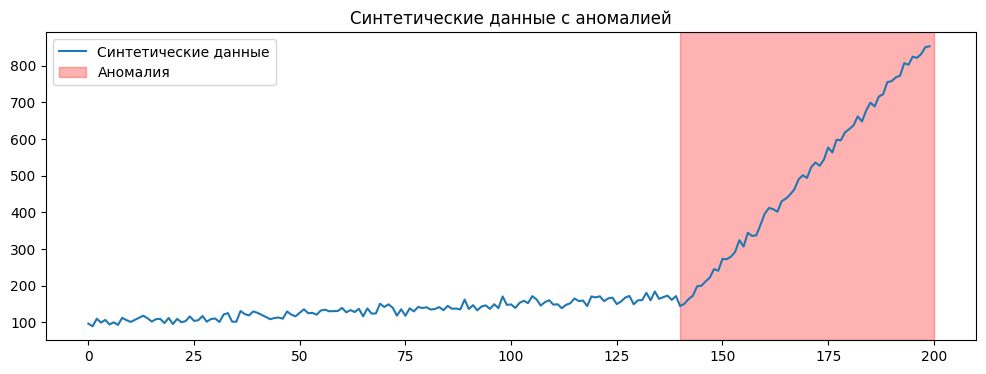

In [180]:
n_points = 200
anomaly_start = 140
anomaly_duration = 60

normal_data = np.linspace(100, n_points, n_points)
# normal_data += np.random.normal(0, 2, len(normal_data))

anomaly = np.linspace(anomaly_start, anomaly_start + anomaly_duration * 12, anomaly_duration)
synthetic = normal_data.copy()
synthetic[anomaly_start:anomaly_start + anomaly_duration] = anomaly
synthetic += np.random.normal(0, 10, len(synthetic))

plt.figure(figsize=(12, 4))
plt.plot(synthetic, label='Синтетические данные')
plt.axvspan(anomaly_start, anomaly_start+anomaly_duration, color='red', alpha=0.3, label='Аномалия')
plt.legend()
plt.title("Синтетические данные с аномалией")
plt.show()

In [181]:
scaler = StandardScaler()
synthetic = synthetic.reshape(-1, 1)
synthetic = scaler.fit_transform(synthetic)

X_test = []

for i in range(len(synthetic) - WINDOW_SIZE + 1):
    X_test.append(synthetic[i:i+WINDOW_SIZE])

X_test = np.array(X_test)
X_test.shape

(169, 32, 1)

In [182]:
preds = model.predict(X_test)
mse = np.mean(np.square(X_test - preds), axis=(1, 2))

6/6 [==============================] - 0s 17ms/step


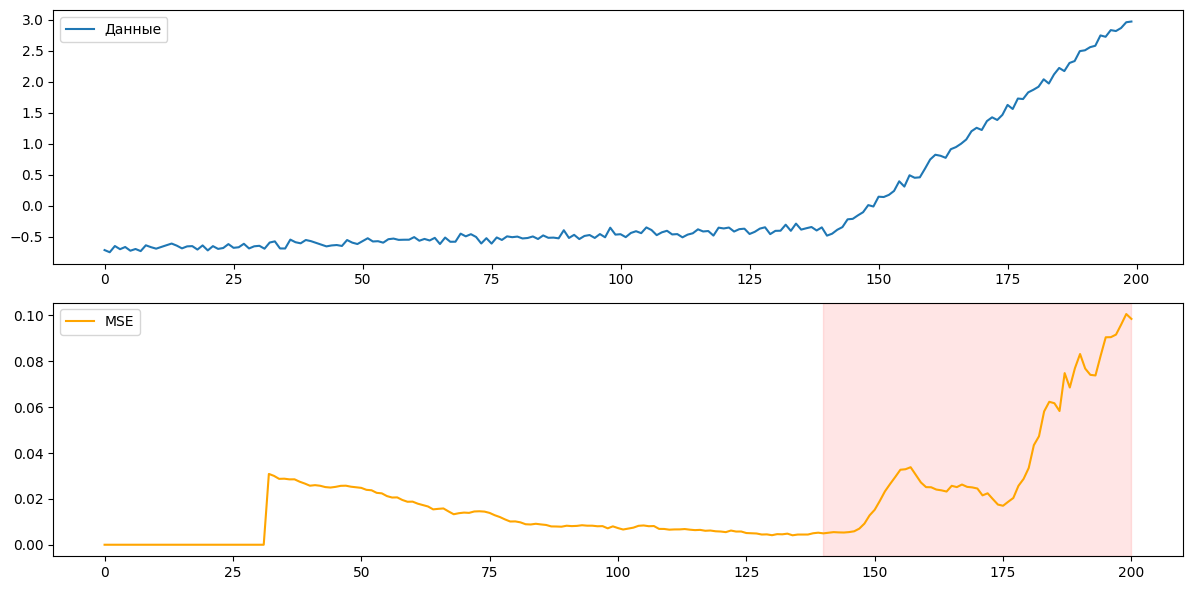

In [184]:
plt.figure(figsize=(12, 6))

# График данных
plt.subplot(2, 1, 1)
plt.plot(synthetic, label='Данные')
plt.legend()

# График ошибок
plt.subplot(2, 1, 2)
plt.plot([0] * WINDOW_SIZE + list(mse), color='orange', label='MSE')
plt.axvspan(anomaly_start, anomaly_start+anomaly_duration, color='red', alpha=0.1)
plt.legend()

plt.tight_layout()
plt.show()

In [188]:
# sample from NAB

data = pd.read_csv('NAB/data/realAWSCloudwatch/ec2_cpu_utilization_24ae8d.csv')[['value']].values

scaler = StandardScaler()
data = data.reshape(-1, 1)
data = scaler.fit_transform(data)

X_test = []

for i in range(len(data) - WINDOW_SIZE + 1):
    X_test.append(data[i:i+WINDOW_SIZE])

X_test = np.array(X_test)

In [189]:
preds = model.predict(X_test)
mse = np.mean(np.square(X_test - preds), axis=(1, 2))

126/126 [==============================] - 2s 16ms/step


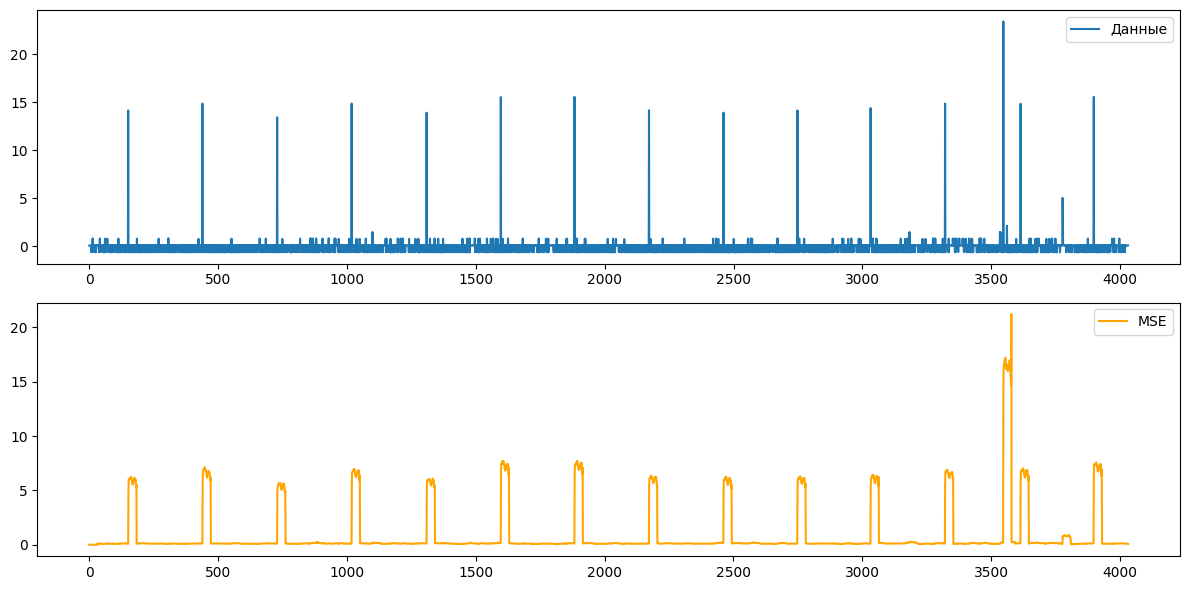

In [192]:
plt.figure(figsize=(12, 6))

# График данных
plt.subplot(2, 1, 1)
plt.plot(data, label='Данные')
plt.legend()

# График ошибок
plt.subplot(2, 1, 2)
plt.plot([0] * WINDOW_SIZE + list(mse), color='orange', label='MSE')
plt.legend()

plt.tight_layout()
plt.show()